Question 1

(a)

In [1]:
import pandas as pd

#read csv into dataframe
dataset_humidity = pd.read_csv('Dataset/humidity.csv')
dataset_rain = pd.read_csv('Dataset/rain.csv')
dataset_temperature = pd.read_csv('Dataset/temperature.csv')
dataset_wind = pd.read_csv('Dataset/wind.csv')
dataset_others = pd.read_csv('Dataset/others.csv')

#step 1: add new column called "Sensor Type"
dataset_humidity.insert(len(dataset_humidity.columns), "Sensor Type", "humidity")
dataset_rain.insert(len(dataset_rain.columns), "Sensor Type", "rain")
dataset_temperature.insert(len(dataset_temperature.columns), "Sensor Type", "temperature")
dataset_wind.insert(len(dataset_wind.columns), "Sensor Type", "wind")
dataset_others.insert(len(dataset_others.columns), "Sensor Type", "others")

#step 2: Combine 5 dataframes into ONE (1) dataframe and sort it by Measurement timestamp ascendingly
frames = [dataset_humidity,dataset_rain,dataset_temperature,dataset_wind,dataset_others]
dataframe = pd.concat(frames).sort_values(by="Measurement Timestamp").reset_index(drop=True)

#print
dataframe

,Station Name,Measurement Timestamp,Humidity,Sensor Type,Rain Intensity,Interval Rain,Total Rain,Air Temperature,Wet Bulb Temperature,Wind Direction,Wind Speed,Maximum Wind Speed,Heading,Precipitation Type,Barometric Pressure,Solar Radiation,Battery Life
0,Oak Street Weather Station,2021-05-17 14:59:59.129877,74.0,humidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63rd Street Weather Station,2021-05-17 14:59:59.380916,NaN,temperature,NaN,NaN,NaN,15.70,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oak Street Weather Station,2021-05-17 14:59:59.450670,NaN,others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1001.5,340.0,12.1
3,Foster Weather Station,2021-05-17 14:59:59.547722,NaN,rain,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Foster Weather Station,2021-05-17 14:59:59.643309,NaN,wind,NaN,NaN,NaN,NaN,NaN,0.0,3.3,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,Oak Street Weather Station,2021-12-18 05:00:00.047692,NaN,temperature,NaN,NaN,NaN,3.50,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74246,Foster Weather Station,2021-12-18 05:00:00.378254,NaN,wind,NaN,NaN,NaN,NaN,NaN,0.0,3.3,0.0,NaN,NaN,NaN,NaN,NaN
74247,Oak Street Weather Station,2021-12-18 05:00:00.581663,90.0,humidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74248,Foster Weather Station,2021-12-18 05:00:00.608831,80.0,humidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(b)

In [3]:
#sort columns by 'station name' then 'measurement timestamp' in ascending order
dataset_digitaltwin = dataframe.sort_values(by=["Station Name","Measurement Timestamp"], ignore_index= True)

#creates a list of column names to be updated to latest values excluding station name and measurement timestamp
columunlist = list(dataset_digitaltwin.columns.values)[2:]

#iterate columns and forward fill
for cols in columunlist:
    dataset_digitaltwin[cols] = dataset_digitaltwin.groupby('Station Name')[cols].ffill()

#print result (use iloc[24618:24622] to check changes between station names)
dataset_digitaltwin.head(15)

,Station Name,Measurement Timestamp,Humidity,Sensor Type,Rain Intensity,Interval Rain,Total Rain,Air Temperature,Wet Bulb Temperature,Wind Direction,Wind Speed,Maximum Wind Speed,Heading,Precipitation Type,Barometric Pressure,Solar Radiation,Battery Life
0,63rd Street Weather Station,2021-05-17 14:59:59.380916,NaN,temperature,NaN,NaN,NaN,15.7,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63rd Street Weather Station,2021-05-17 14:59:59.956473,NaN,rain,0.0,0.0,11.0,15.7,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63rd Street Weather Station,2021-05-17 15:00:00.321877,NaN,wind,0.0,0.0,11.0,15.7,14.0,51.0,1.3,2.7,352.0,NaN,NaN,NaN,NaN
3,63rd Street Weather Station,2021-05-17 15:00:00.741304,NaN,others,0.0,0.0,11.0,15.7,14.0,51.0,1.3,2.7,352.0,0.0,1000.6,467.0,11.8
4,63rd Street Weather Station,2021-05-17 15:00:00.889681,83.0,humidity,0.0,0.0,11.0,15.7,14.0,51.0,1.3,2.7,352.0,0.0,1000.6,467.0,11.8
5,63rd Street Weather Station,2021-05-17 15:59:59.209392,83.0,rain,0.0,0.0,11.0,15.7,14.0,51.0,1.3,2.7,352.0,0.0,1000.6,467.0,11.8
6,63rd Street Weather Station,2021-05-17 15:59:59.424498,84.0,humidity,0.0,0.0,11.0,15.7,14.0,51.0,1.3,2.7,352.0,0.0,1000.6,467.0,11.8
7,63rd Street Weather Station,2021-05-17 15:59:59.811665,84.0,temperature,0.0,0.0,11.0,16.1,14.4,51.0,1.3,2.7,352.0,0.0,1000.6,467.0,11.8
8,63rd Street Weather Station,2021-05-17 16:00:00.232908,84.0,wind,0.0,0.0,11.0,16.1,14.4,51.0,1.1,1.9,351.0,0.0,1000.6,467.0,11.8
9,63rd Street Weather Station,2021-05-17 16:00:00.452415,84.0,others,0.0,0.0,11.0,16.1,14.4,51.0,1.1,1.9,351.0,0.0,1000.3,283.0,11.9


(c)

In [4]:
import datetime
#drop the sensor column
dataset_digitaltwin = dataset_digitaltwin.drop('Sensor Type', 1)
#convert str to timestamp 
dataset_digitaltwin["Measurement Timestamp"] = pd.to_datetime(dataset_digitaltwin["Measurement Timestamp"])
#group timing intervals of T:16:00 to T+1:15:59 together then keep only latest value
dataset_digitaltwin = dataset_digitaltwin.groupby(['Station Name', pd.Grouper(key="Measurement Timestamp", freq="H", offset="16T")]).tail(1)
dataset_digitaltwin.reset_index(inplace=True, drop=True)
#create the Hourly timestamp column
dataset_digitaltwin.insert(1,'Hourly Timestamp', pd.to_datetime(dataset_digitaltwin["Measurement Timestamp"]).dt.round('H'))
#print
dataset_digitaltwin

C:\Users\VINCEN~1\AppData\Local\Temp/ipykernel_14456/1606458282.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset_digitaltwin = dataset_digitaltwin.drop('Sensor Type', 1)


,Station Name,Hourly Timestamp,Measurement Timestamp,Humidity,Rain Intensity,Interval Rain,Total Rain,Air Temperature,Wet Bulb Temperature,Wind Direction,Wind Speed,Maximum Wind Speed,Heading,Precipitation Type,Barometric Pressure,Solar Radiation,Battery Life
0,63rd Street Weather Station,2021-05-17 15:00:00,2021-05-17 15:00:00.889681,83.0,0.0,0.0,11.0,15.7,14.0,51.0,1.3,2.7,352.0,0.0,1000.6,467.0,11.8
1,63rd Street Weather Station,2021-05-17 16:00:00,2021-05-17 16:00:00.452415,84.0,0.0,0.0,11.0,16.1,14.4,51.0,1.1,1.9,351.0,0.0,1000.3,283.0,11.9
2,63rd Street Weather Station,2021-05-17 17:00:00,2021-05-17 17:00:00.459542,81.0,0.0,0.0,11.0,15.7,13.8,85.0,1.0,2.3,351.0,0.0,1000.4,196.0,11.9
3,63rd Street Weather Station,2021-05-17 18:00:00,2021-05-17 18:00:00.853017,89.0,0.0,0.0,11.0,14.6,13.5,80.0,2.5,3.6,351.0,0.0,1000.6,145.0,11.9
4,63rd Street Weather Station,2021-05-17 19:00:00,2021-05-17 19:00:00.677726,89.0,0.0,0.0,11.0,14.4,13.3,10.0,1.4,2.2,350.0,60.0,1000.4,155.0,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,Oak Street Weather Station,2021-12-18 01:00:00,2021-12-18 00:59:59.922906,65.0,0.0,0.1,25.7,5.1,2.6,110.0,3.8,5.3,357.0,0.0,995.9,0.0,11.9
14846,Oak Street Weather Station,2021-12-18 02:00:00,2021-12-18 02:00:00.871278,77.0,0.6,0.9,26.5,3.8,2.2,110.0,4.2,6.3,357.0,60.0,995.2,0.0,11.9
14847,Oak Street Weather Station,2021-12-18 03:00:00,2021-12-18 03:00:00.643588,81.0,0.0,0.0,26.6,3.9,2.6,104.0,4.6,6.0,357.0,0.0,994.8,0.0,11.9
14848,Oak Street Weather Station,2021-12-18 04:00:00,2021-12-18 04:00:00.650439,87.0,0.0,0.1,26.7,3.6,2.7,74.0,4.8,6.1,357.0,0.0,994.8,0.0,11.9


(d)

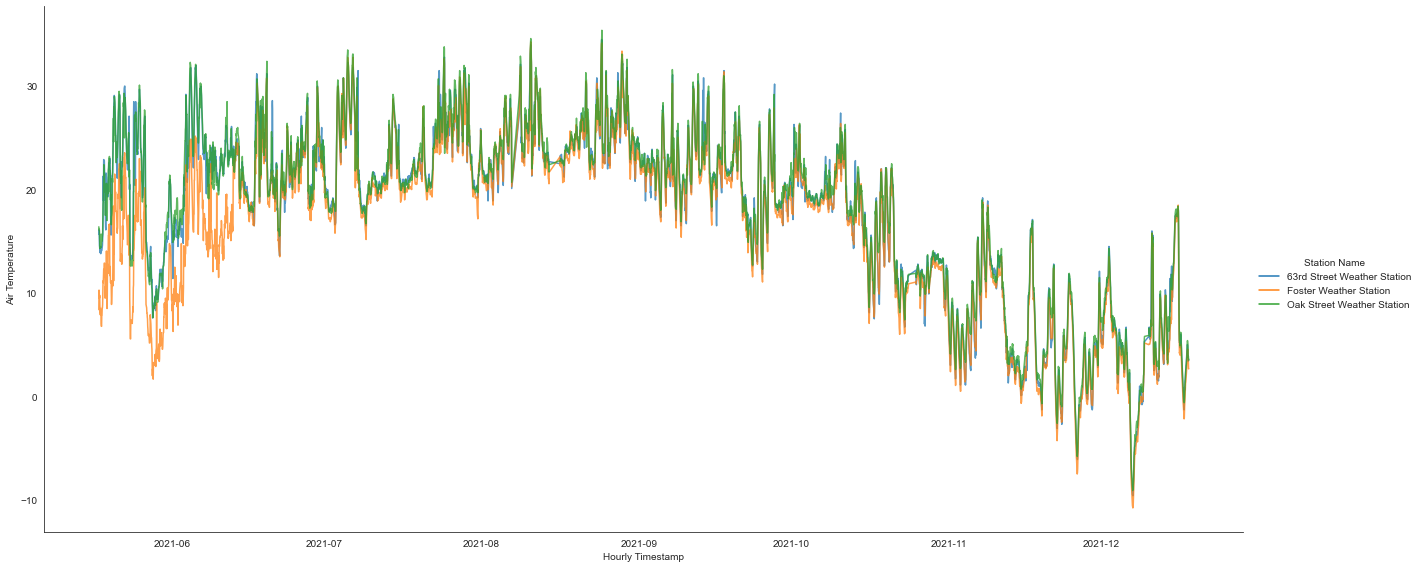

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

#set relevant data into new dataset
dataset_lineplot = dataset_digitaltwin[["Station Name","Hourly Timestamp","Air Temperature"]].reset_index(drop=True)

#plotting and styling the graph
sns.set_style("white")
sns.relplot(x="Hourly Timestamp",
            y="Air Temperature",
            data=dataset_lineplot, 
            hue="Station Name",
            kind="line",
            alpha=0.75,
            height = 8, 
            aspect = 2.2
            )


1. The air temperature for all 3 stations are closely related, they maybe very near one another in terms of distance that led to nearly the same graph pattern. <br>
2. There is a sudden dip in air temperature towards the end into the negatives, this maybe due to heavy rain resulting in the drop in temperature and can be dangerous as rain in negative air temperatures can result in hailstorm.

(e)

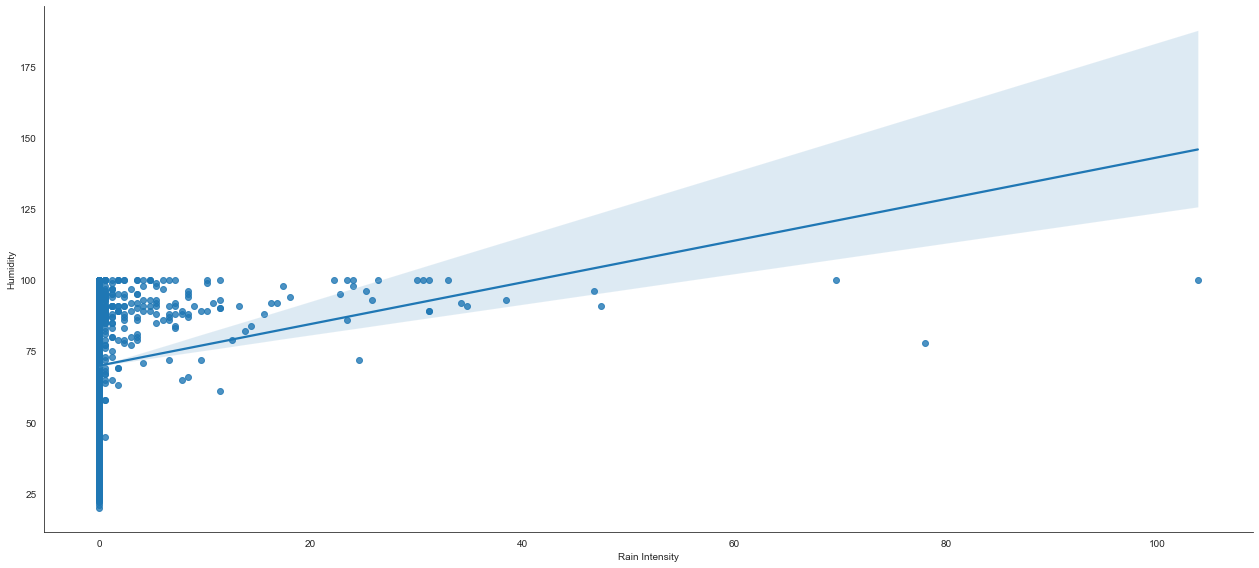

In [6]:
#set relevant data into new dataset
dataset_lineplot = dataset_digitaltwin[["Station Name","Humidity","Rain Intensity"]].reset_index(drop=True)

#plotting and styling the graph
sns.set_style("white")
sns.lmplot( x="Rain Intensity",
            y="Humidity",
            data=dataset_lineplot, 
            height = 8, 
            aspect = 2.2
            )

The scatterplot above indicates that there is no correlation between humidity and rain intensity. If there is, there should be an upwards or downwards scatter along the regression line. It seems that humidity remains constant regardless of the intensity of the rain.

Question 2

(a)

In [2]:
import requests
import sqlite3
import re
from bs4 import BeautifulSoup

#create database and cursor
conn = sqlite3.connect('family tree of British monarchs.db')
c = conn.cursor()

#create the table
c.execute('''CREATE TABLE if not exists british_monarch_family_tree(id INTEGER PRIMARY KEY AUTOINCREMENT, name TEXT NOT NULL, wiki_url TEXT NOT NULL)''')

#user agent
user_agent = {'User-agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'}

#george's family tree url
url = 'https://en.wikipedia.org/w/index.php?title=Family_tree_of_British_monarchs&oldid=1043575587'

r = requests.get(url, headers= user_agent)
soup = BeautifulSoup(r.content, 'html.parser')

#define scope within table (take first table because second is wiki references)
table = soup.find('table')
#list comphrension to return a list of anchor tags inside tabledata 
anchors = [a for a in (td.find('a') for td in table.findAll('td')) if a]

#get url and title then append into dictionary
expression = re.compile('^House', re.IGNORECASE)   
for a in anchors:
    #remove unwanted list element like "house of"
    if expression.match(a.text):
        anchors.remove(a) 

for data in anchors:  
    #first clean missed out house of blois -need to figure out why
    if expression.match(data.text):
        anchors.remove(data)

#for loop insert values into database's table
for datas in anchors: 
    name = datas.get('title')
    wiki_url = datas.get('href')
    c.execute('''INSERT INTO british_monarch_family_tree(name, wiki_url) VALUES(?,?)''', (name, wiki_url))

#commit the changes
conn.commit()

(b)

In [16]:
#add fields into the table
c.execute('''ALTER TABLE british_monarch_family_tree ADD father_id INTEGER''')
c.execute('''ALTER TABLE british_monarch_family_tree ADD mother_id INTEGER''')

#commit the changes
conn.commit()

#list to store fetched details
monarchDict = {}

#[0]id[1]name[2]wiki_url[3]father_id[4]mother_id
c.execute("SELECT * FROM british_monarch_family_tree")
fetchedData = c.fetchall() #change to fetchall after testing

#convert tuples into lists
fetchedData_list = [list(data) for data in fetchedData]

#regex for removing anything after ,
rgx = re.compile("\,.*$")

#iterate list fetched from database then find website for match
for entry in fetchedData_list:
    url = ('https://en.wikipedia.org' + entry[2])
    r = requests.get(url, headers= user_agent)
    soup = BeautifulSoup(r.content, 'html.parser')

    #focus search in table with class infobox vcard
    table = soup.find('table', {'class':'infobox vcard'})
    #get father's name
    fathertext = table.find('th',string="Father")
    if fathertext != None:
        father_name = fathertext.findNextSibling('td').contents[0].getText()
        #father_name = re.sub(rgx,"",father_name)
    #get mother's name
    mothertext = table.find('th',string="Mother")
    if mothertext != None:
        mother_name = mothertext.findNextSibling('td').contents[0].getText()
        #mother_name = re.sub(rgx,"",mother_name)

    for row in fetchedData_list:
        if row[1] == father_name or row[1] == mother_name:
            #get fathers_id if match
            if row[1] == father_name:
                fathers_id = row[0]
                entry[3] = fathers_id
            #get mothers_id if match
            else:
                mothers_id = row[0]
                entry[4] = mothers_id
            break
        #return none otherwise
        else:
            entry[3] = None
            entry[4] = None
             
#update the database  
for data in fetchedData_list:
    c.execute('''UPDATE british_monarch_family_tree SET father_id = ?, mother_id = ? WHERE id = ?''', (data[3], data[4], data[0]))
        
#commit the changes
conn.commit()

(c)

In [17]:
#get king george III id
Id_GeorgeIII = c.execute('''SELECT id FROM british_monarch_family_tree WHERE name= "George III of the United Kingdom" ''').fetchone()
#check database for matching father_id and print
children_GeorgeIII = c.execute('''SELECT name FROM british_monarch_family_tree WHERE father_id= ?''',(Id_GeorgeIII)).fetchall()
#print result
print("The childrens of George III of the United Kingdom are:")
for children in children_GeorgeIII:
    children = str(children).strip('()\',')
    print(children)

The childrens of George III of the United Kingdom are:
George IV of the United Kingdom
William IV of the United Kingdom
Prince Edward, Duke of Kent and Strathearn


(D)

In [18]:
#get father and mother id of George III of the United Kingdom
FM_GeorgeIII = c.execute('''SELECT father_id, mother_id FROM british_monarch_family_tree WHERE id=?''',(Id_GeorgeIII)).fetchone()
#check database for matching id [0]father_id[1]mother_id
for i in range(0,len(FM_GeorgeIII)):
    if FM_GeorgeIII[i] is not None:
        para = int(FM_GeorgeIII[i])
        if i == 0:
            father_GeorgeIII = c.execute('''SELECT name FROM british_monarch_family_tree WHERE id=?''',(para,)).fetchone()
            father_GeorgeIII = str(father_GeorgeIII).strip('()\',')
        else:
            father_GeorgeIII = "Cannot find in database"
        if i == 1:
            mother_GeorgeIII = c.execute('''SELECT name FROM british_monarch_family_tree WHERE id=?''',(para,)).fetchone()
            mother_GeorgeIII = str(mother_GeorgeIII).strip('()\',')
        else:
            mother_GeorgeIII = "Cannot find in database"

print(f"The father of King 'George III' is: {father_GeorgeIII} \nThe mother of King 'George III' is: {mother_GeorgeIII}" )

The father of King 'George III' is: Frederick, Prince of Wales 
The mother of King 'George III' is: Cannot find in database


(E)

In [19]:
#get King "George IV" id
Id_GeorgeIV = c.execute('''SELECT id FROM british_monarch_family_tree WHERE name= "George IV of the United Kingdom" ''').fetchone()
#get King "George IV" father and mother id
FM_GeorgeIV = c.execute('''SELECT father_id, mother_id FROM british_monarch_family_tree WHERE id=?''',(Id_GeorgeIV)).fetchone()
#use id to find siblings
for FM in FM_GeorgeIV:
    if FM is not None:
        fatherside_siblings = c.execute('''SELECT name FROM british_monarch_family_tree WHERE father_id=?''',(FM,)).fetchall()
        motherside_siblings = c.execute('''SELECT name FROM british_monarch_family_tree WHERE mother_id=?''',(FM,)).fetchall()

siblings_GeorgeIV = fatherside_siblings + motherside_siblings
#remove george iv himself
for i in range(0,len(siblings_GeorgeIV)-1):
    siblings_GeorgeIV[i] = str(siblings_GeorgeIV[i]).strip('()\',')
    if siblings_GeorgeIV[i] == 'George IV of the United Kingdom':
        siblings_GeorgeIV.pop(i)

#print results
print("The siblings of King 'George IV' are:")
for siblings in siblings_GeorgeIV:
    siblings = str(siblings).strip('()\',')
    print(siblings)


The siblings of King 'George IV' are:
William IV of the United Kingdom
Prince Edward, Duke of Kent and Strathearn


(F)

In [56]:
desc_list_victoria = []
#get queen victoria id
Id_Victoria = c.execute('''SELECT id FROM british_monarch_family_tree WHERE name= "Queen Victoria" ''').fetchone()
#search under mother_id for matching childs and save result to list until both father_id and mother_id is null/none

#used when more than one descendant
checker_IDs = []

while True:
    #set first id to be checked as queen victoria's
    if len(desc_list_victoria) == 0:
        checker_ID = Id_Victoria
        currentDesc_Father = c.execute('''SELECT id, name FROM british_monarch_family_tree WHERE father_id= ?''',(checker_ID)).fetchall()
        currentDesc_Mother = c.execute('''SELECT id, name FROM british_monarch_family_tree WHERE mother_id= ?''',(checker_ID)).fetchall()
    else:
        #second set data onwards
        if len(checker_IDs) > 1:
            for IDs in checker_IDs:
                currentDesc_Father = c.execute('''SELECT id, name FROM british_monarch_family_tree WHERE father_id= ?''',(IDs,)).fetchall()
                currentDesc_Mother = c.execute('''SELECT id, name FROM british_monarch_family_tree WHERE mother_id= ?''',(IDs,)).fetchall()
            checker_IDs = []
        else:
            currentDesc_Father = c.execute('''SELECT id, name FROM british_monarch_family_tree WHERE father_id= ?''',(checker_ID,)).fetchall()
            currentDesc_Mother = c.execute('''SELECT id, name FROM british_monarch_family_tree WHERE mother_id= ?''',(checker_ID,)).fetchall()
    
    #add values into list then change checker_ID to new ID
    #father side
    if len(currentDesc_Father) == 1:
        desc_list_victoria.append(currentDesc_Father[0][1])
        checker_ID = currentDesc_Father[0][0]
    #more than 1 descendant
    elif len(currentDesc_Father) > 1:
        for desc in currentDesc_Father:
            desc_list_victoria.append(desc[1])
            checker_IDs.append(desc[0])
    #mother side
    elif len(currentDesc_Mother) == 1:
        desc_list_victoria.append(currentDesc_Mother[0][1])
        checker_ID = currentDesc_Mother[0][0]
    elif len(currentDesc_Mother) > 1:
        for desc in currentDesc_Mother:
            desc_list_victoria.append(desc[1])
            checker_IDs.append(desc[0])
    else:
        break

#print results
print("The descendants of Queen Elizabeth are:")
for descendants in desc_list_victoria:
    print(descendants)


The descendants of Queen Elizabeth are:
Edward VII
George V
Edward VIII
George VI
Elizabeth II
